<a href="https://colab.research.google.com/github/Aduomas/PP5/blob/main/Practical_Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

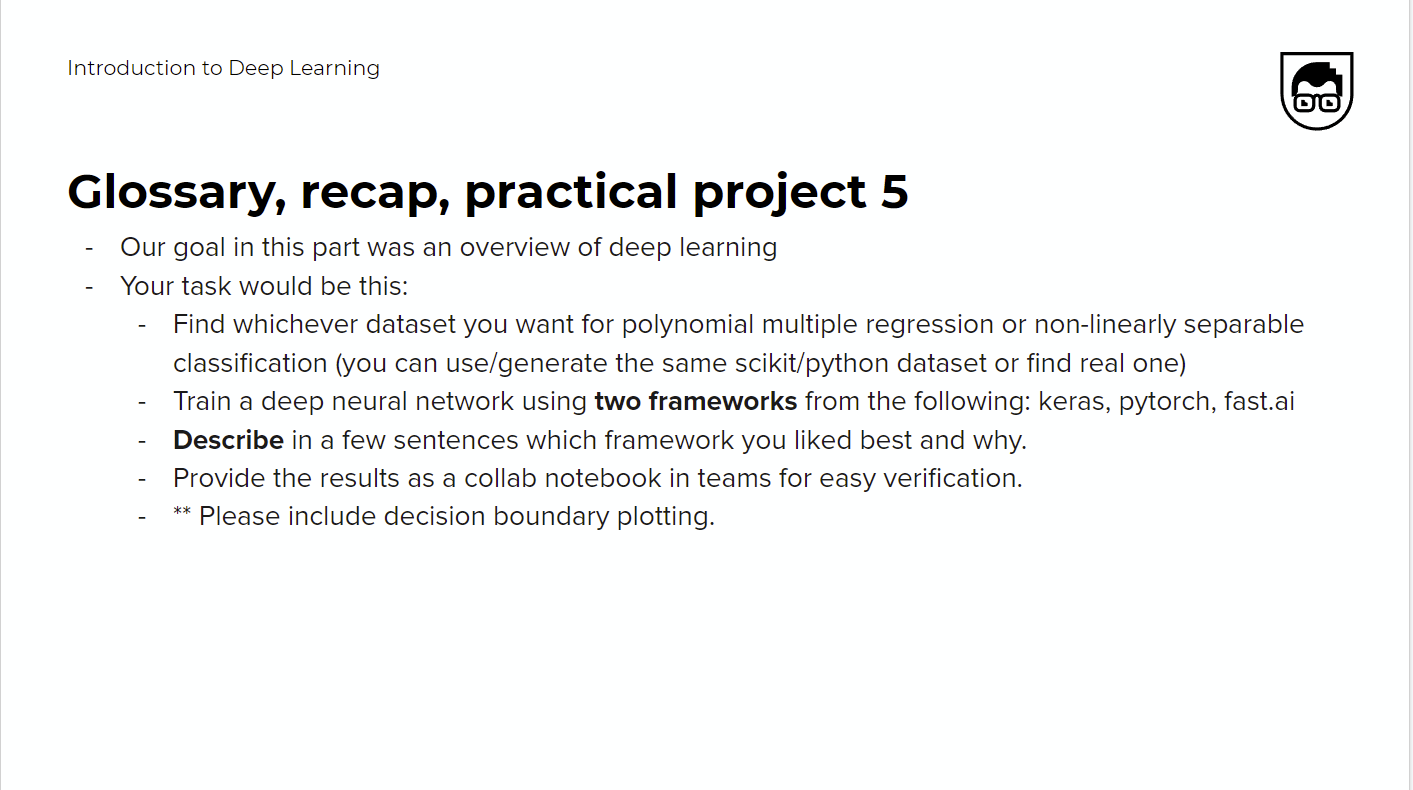

## Choosing a dataset
https://www.kaggle.com/kukuroo3/used-car-price-dataset-competition-format?select=y_train.csv

## Keras


In [ ]:
!wget https://raw.githubusercontent.com/Aduomas/PP5/main/X_test.csv
!wget https://raw.githubusercontent.com/Aduomas/PP5/main/X_train.csv
!wget https://raw.githubusercontent.com/Aduomas/PP5/main/y_train.csv
!wget https://raw.githubusercontent.com/Aduomas/PP5/main/y_test.csv

--2021-12-21 14:23:07--  https://raw.githubusercontent.com/Aduomas/PP5/main/X_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161829 (158K) [text/plain]
Saving to: ‘X_test.csv.5’

X_test.csv.5        100%[===================>] 158.04K  --.-KB/s    in 0.02s   

2021-12-21 14:23:07 (7.10 MB/s) - ‘X_test.csv.5’ saved [161829/161829]

--2021-12-21 14:23:07--  https://raw.githubusercontent.com/Aduomas/PP5/main/X_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300116 (293K) [text/plain]
Saving to: ‘X_train.csv.5’

X_t

### Load Data

In [ ]:
import pandas as pd

x_train = pd.read_csv('X_train.csv', index_col='carID')
x_test = pd.read_csv('X_test.csv', index_col='carID')
y_train = pd.read_csv('y_train.csv', index_col='carID')
y_test = pd.read_csv('y_test.csv', index_col='carID')

### Preproccessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[['mileage','mpg','tax','engineSize']] = scaler.fit_transform(x_train[['mileage','mpg','tax','engineSize']])
x_test[['mileage','mpg','tax','engineSize']] = scaler.transform(x_test[['mileage','mpg','tax','engineSize']])

brand_encoder = LabelEncoder()
x_train['brand'] = brand_encoder.fit_transform(x_train['brand'])
x_test['brand'] = brand_encoder.transform(x_test['brand'])

model_encoder = LabelEncoder()
x_train['model'] = model_encoder.fit_transform(x_train['model'])
x_test['model'] = model_encoder.transform(x_test['model'])

transmission_encoder = LabelEncoder()
x_train['transmission'] = transmission_encoder.fit_transform(x_train['transmission'])
x_test['transmission'] = transmission_encoder.transform(x_test['transmission'])

fuelType_encoder = LabelEncoder()
x_train['fuelType'] = fuelType_encoder.fit_transform(x_train['fuelType'])
x_test['fuelType'] = fuelType_encoder.transform(x_test['fuelType'])


x_train

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
carID,,,,,,,,,
13207,3,69,2019,3,-0.848304,0,-0.088993,-0.295744,0.095814
17314,7,30,2015,1,0.937516,0,-0.331725,0.272200,-0.157579
12342,0,58,2019,0,-0.810335,4,-0.088993,-0.595105,0.982689
13426,8,71,2016,0,-0.185480,0,-1.484700,0.202256,-0.157579
16004,5,70,2020,3,-0.875062,4,-0.088993,-0.091508,-1.424542
...,...,...,...,...,...,...,...,...,...
16898,4,26,2015,0,-0.026279,0,-0.331725,0.174279,-0.030882
14416,1,0,2017,0,-0.284617,0,-0.088993,0.028795,1.109385
15453,8,11,2015,1,2.453911,0,-1.484700,0.272200,-0.157579


In [ ]:
!pip install livelossplot

### Model training || ~15mins

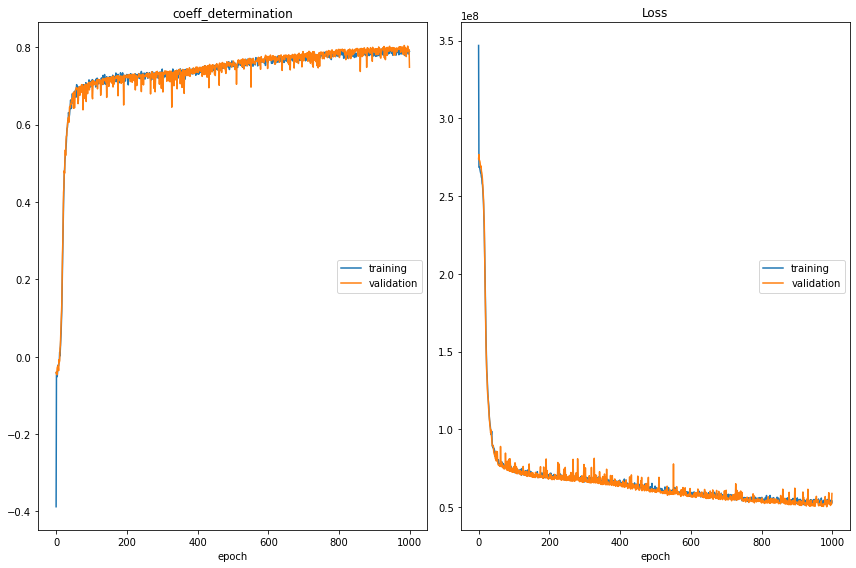

coeff_determination
	training         	 (min:   -0.388, max:    0.800, cur:    0.790)
	validation       	 (min:   -0.047, max:    0.805, cur:    0.749)
Loss
	training         	 (min: 51345556.000, max: 346886208.000, cur: 53910040.000)
	validation       	 (min: 50184172.000, max: 276694432.000, cur: 58713464.000)
155/155 [==============================] - 1s 9ms/step - loss: 53910040.0000 - coeff_determination: 0.7898 - val_loss: 58713464.0000 - val_coeff_determination: 0.7486
Test loss: 58713464.0
Test R2: 0.7486193776130676


In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.layers import Dropout
import numpy as np
from sklearn.metrics import r2_score
from keras.layers import BatchNormalization

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

model = models.Sequential()
model.add(layers.Dense(1024, activation="relu", input_shape=(9,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dropout(0.2)),
model.add(layers.Dense(1))

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss='mse', metrics=[coeff_determination])


model.fit(x_train.astype(np.float32), y_train.astype(np.float32),
          batch_size=32,
          epochs=1000,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test R2:', score[1])

### Save model

In [ ]:
model.save('my_model.h5') # 13 mb

In [ ]:
!wget https://github.com/Aduomas/PP5/blob/main/my_model.h5?raw=true

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('my_model.h5', custom_objects={'coeff_determination':coeff_determination})
print(model.evaluate(x=x_test.astype(np.float32), y=y_test.values.astype(np.float32)))

compare_df_keras = pd.DataFrame({'actual': np.squeeze(y_test.values.astype(np.float32)), 'predicted': np.squeeze(model.predict(x_test.astype(np.float32)))})

compare_df_keras.sample(20)

84/84 [==============================] - 1s 4ms/step - loss: 50586200.0000 - coeff_determination: 0.7993
[50586200.0, 0.7993358373641968]


,actual,predicted
2164,10995.0,18753.164062
961,7830.0,6922.877930
803,45488.0,47616.769531
1674,21999.0,22580.005859
1123,27249.0,22255.367188
840,32490.0,36348.664062
2611,8847.0,9803.110352
2379,3930.0,4762.210938
2270,15995.0,9040.111328
807,46998.0,46406.480469


### Plot predictions vs actual || Keras

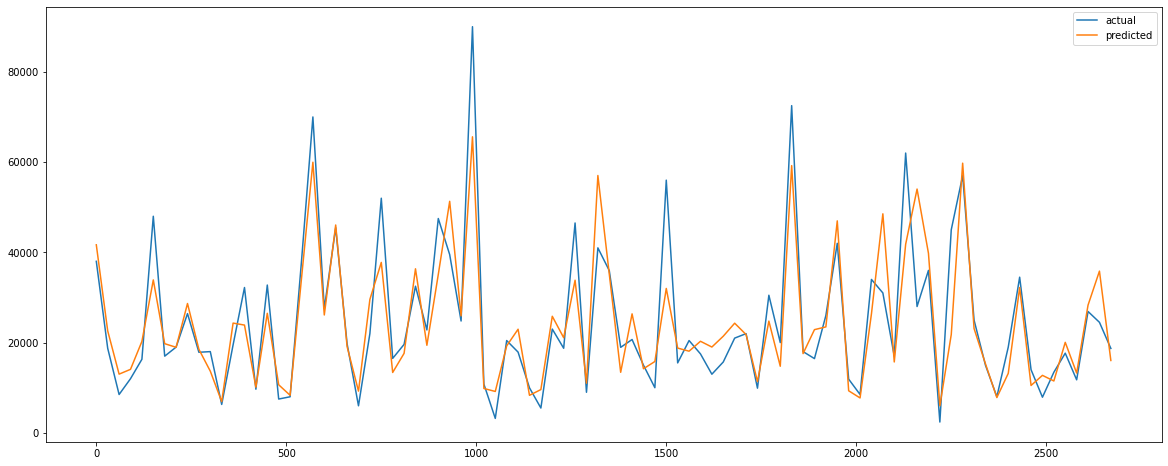

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,8)

compare_df_keras.iloc[::30].plot() # plot every 30th

## FastAI


In [ ]:
!wget https://raw.githubusercontent.com/Aduomas/PP5/main/X_test.csv
!wget https://raw.githubusercontent.com/Aduomas/PP5/main/X_train.csv
!wget https://raw.githubusercontent.com/Aduomas/PP5/main/y_train.csv
!wget https://raw.githubusercontent.com/Aduomas/PP5/main/y_test.csv

--2021-12-21 13:28:03--  https://raw.githubusercontent.com/Aduomas/PP5/main/X_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161829 (158K) [text/plain]
Saving to: ‘X_test.csv.4’

X_test.csv.4        100%[===================>] 158.04K  --.-KB/s    in 0.02s   

2021-12-21 13:28:03 (6.83 MB/s) - ‘X_test.csv.4’ saved [161829/161829]

--2021-12-21 13:28:03--  https://raw.githubusercontent.com/Aduomas/PP5/main/X_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300116 (293K) [text/plain]
Saving to: ‘X_train.csv.4’

X_t

### Load Data

In [ ]:
import pandas as pd

x_train = pd.read_csv('X_train.csv', index_col='carID')
x_test = pd.read_csv('X_test.csv', index_col='carID')
y_train = pd.read_csv('y_train.csv', index_col='carID')
y_test = pd.read_csv('y_test.csv', index_col='carID')

In [ ]:
x_train.dtypes

brand            object
model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [ ]:
X = pd.concat([x_train, x_test])
Y = pd.concat([y_train, y_test])

df = pd.concat([X, Y], axis=1)
df

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
carID,,,,,,,,,,
13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990
...,...,...,...,...,...,...,...,...,...,...
19618,audi,A7,2015,Semi-Auto,21100,Petrol,325.0,29.7,4.0,28990
19620,merc,CLS Class,2015,Automatic,60972,Diesel,160.0,52.3,3.0,17450
19626,ford,Puma,2020,Manual,4111,Petrol,145.0,50.4,1.0,21995


In [ ]:
!pip install fastai==2.5.3

In [ ]:
import fastai
fastai.__version__

'2.5.3'

### Preprocessing

In [ ]:
from fastai import *
from fastai.tabular import *
from fastai.tabular.all import *
from fastai.torch_basics import *
from fastai.data.all import *
from fastai.tabular.core import *

dep_var = 'price'

cat_names = ['brand', 'model', 'transmission', 'fuelType']

cont_names = ['year', 'mileage', 'tax', 'mpg', 'engineSize'] # , 

procs = [Normalize, Categorify]


In [ ]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var) 
(cont, cat)

(['year', 'mileage', 'tax', 'mpg', 'engineSize'],
 ['brand', 'model', 'transmission', 'fuelType'])

In [ ]:
data = TabularDataLoaders.from_df(df=df,y_names=dep_var, procs=procs, cat_names=cat_names, cont_names=cont_names, bs=64, valid_idx=list(range(1000,2500)))

In [ ]:
data.show_batch()

,brand,model,transmission,fuelType,year,mileage,tax,mpg,engineSize,price
0,audi,A7,Semi-Auto,Diesel,2015.0,42686.999309,150.000000,54.299999,3.0,17888.0
1,skoda,Rapid,Manual,Diesel,2016.0,15709.000226,-0.000002,78.499999,1.4,9795.0
2,vw,Caravelle,Manual,Diesel,2015.0,35977.000203,200.000001,45.599998,2.0,26500.0
3,ford,Edge,Semi-Auto,Diesel,2018.0,9599.999871,145.000000,47.900002,2.0,25990.0
4,vw,Scirocco,Manual,Diesel,2017.0,26627.999977,145.000000,53.299999,2.0,15995.0
5,merc,GLS Class,Semi-Auto,Petrol,2018.0,41101.999865,145.000000,23.000000,5.5,64999.0
6,bmw,X4,Semi-Auto,Diesel,2019.0,10802.000203,145.000000,37.200001,3.0,38500.0
7,merc,GLS Class,Semi-Auto,Diesel,2017.0,32875.000338,305.000001,37.200001,3.0,41990.0
8,bmw,Z4,Semi-Auto,Petrol,2020.0,999.999528,145.000000,38.700001,2.0,31980.0
9,vw,Amarok,Automatic,Diesel,2019.0,6822.000683,260.000002,33.599999,3.0,30700.0


### Model init

In [ ]:
learn = tabular_learner(data, layers=[1024, 1024], metrics=R2Score())

In [ ]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(91, 20)
    (2): Embedding(5, 4)
    (3): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=39, out_features=1024, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=1024, out_features=1024, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=1024, out_features=1, bias=True)
    )
  )
)

SuggestedLRs(valley=0.2089296132326126)

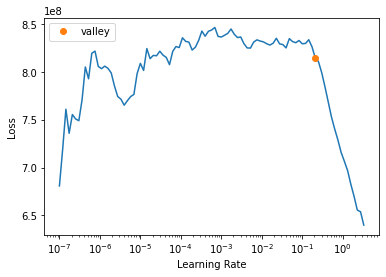

In [ ]:
learn.lr_find()

### Model training

In [ ]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,r2_score,time
0,820193472.000000,797681728.000000,-2.176909,00:02
1,823416704.000000,797553472.000000,-2.176398,00:02
2,843322176.000000,797401920.000000,-2.175794,00:03
3,834632704.000000,797165760.000000,-2.174854,00:01
4,838816832.000000,796781120.000000,-2.173322,00:01
5,843332608.000000,796373184.000000,-2.171697,00:01
6,829538624.000000,795490368.000000,-2.168182,00:01
7,844837184.000000,794837184.000000,-2.165580,00:01
8,837125696.000000,793261312.000000,-2.159304,00:01
9,829121728.000000,791469888.000000,-2.152169,00:01


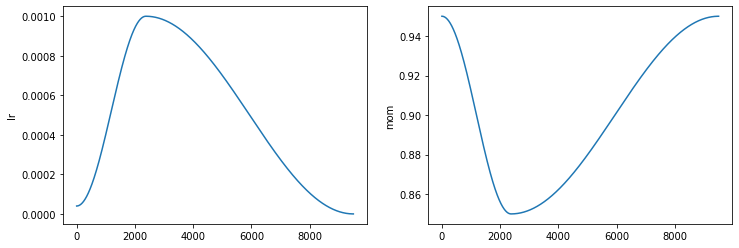

In [ ]:
learn.recorder.plot_sched()

In [ ]:
learn.fit(100)

epoch,train_loss,valid_loss,r2_score,time
0,19016802.000000,26869750.000000,0.892986,00:02
1,16746794.000000,24998066.000000,0.900441,00:02
2,16242919.000000,20591418.000000,0.917991,00:03
3,15156905.000000,22749786.000000,0.909395,00:01
4,15502788.000000,23876584.000000,0.904907,00:01
5,13690281.000000,18908080.000000,0.924695,00:01
6,13299333.000000,16653087.000000,0.933676,00:01
7,15445639.000000,19565748.000000,0.922076,00:03
8,15777567.000000,16733211.000000,0.933357,00:02
9,13888340.000000,22723774.000000,0.909499,00:02


### Save model

In [ ]:
learn.export() # 5 mb

In [ ]:
!wget https://github.com/Aduomas/PP5/blob/main/export%20(1).pkl?raw=true

In [ ]:
learn = load_learner('export (1).pkl')

test_dl = learn.dls.test_dl(x_test)
compare_df_fastai = pd.DataFrame({'actual': np.squeeze(y_test.values.astype(np.float32)), 'predicted': np.squeeze(learn.get_preds(dl=test_dl)[0].numpy())})

compare_df_fastai.sample(20)

,actual,predicted
1040,20600.0,19296.466797
686,29490.0,27696.570312
1076,33495.0,30217.830078
518,56000.0,40385.546875
783,16590.0,17234.783203
1973,47980.0,45691.820312
145,8691.0,9102.890625
1016,22890.0,21489.101562
1703,15440.0,13493.028320
331,26990.0,22675.513672


### Plot predictions vs actual || Fast.ai

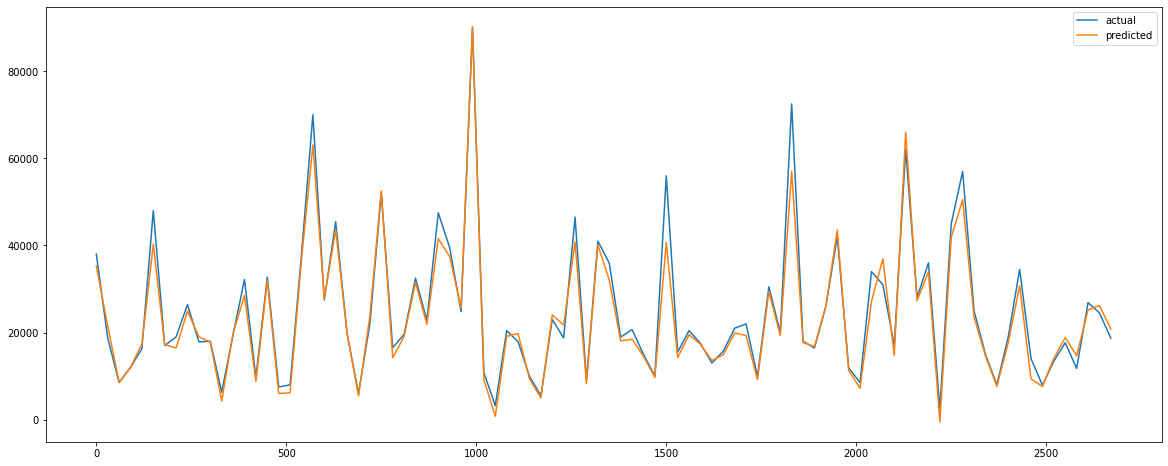

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,8)

compare_df_fastai.iloc[::30].plot() # plot every 30th

## Conclusion && plot

We can see that model hyperparameter tuning was similar, I was using same layers [1024, 1024] with relu activations, fast.ai uses fit_one_cycle, which I didn't implement in keras, so learning rate for fast ai model is different than keras. Keras model was worse in terms of r2 score and training time, this is where fast.ai fit_one_cycle method helped enormously. I've used fast.ai v2, which was a pain to get ready as it has changed significantly from v1 and not a lot of resources or tutorials are out there for fast.ai. Not only that, I couldn't understand documentation properly and it took a while to get used to. Even though fast.ai was better in terms of performance(training time, precision), I enjoyed making keras model more, it was much more intuitive to code.

Don't forget, it's on validation set, incredible.

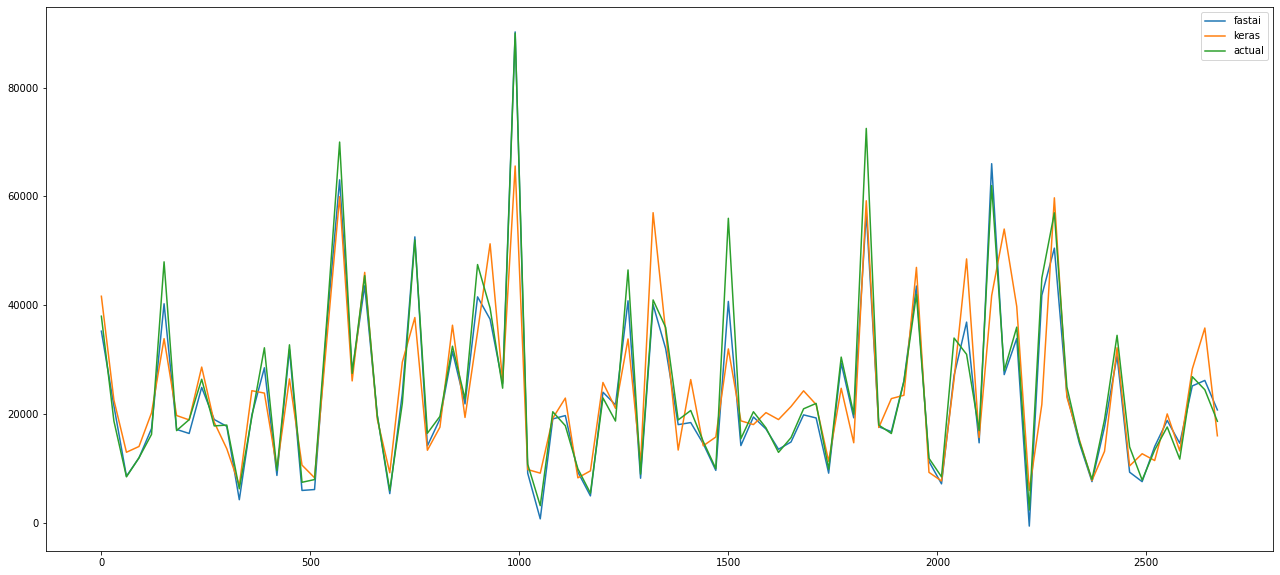

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (22,10)

fig, ax = plt.subplots()
ax.plot(compare_df_fastai.index[::30], compare_df_fastai['predicted'][::30], label='fastai') # plot every 30th 
ax.plot(compare_df_keras.index[::30], compare_df_keras['predicted'][::30], label='keras')    # plot every 30th
ax.plot(compare_df_keras.index[::30], compare_df_keras['actual'][::30], label='actual')      # plot every 30th
ax.legend()
plt.show()